In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/aksha/AG/vscode/Projects/Iris_Flower-CLassifier/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

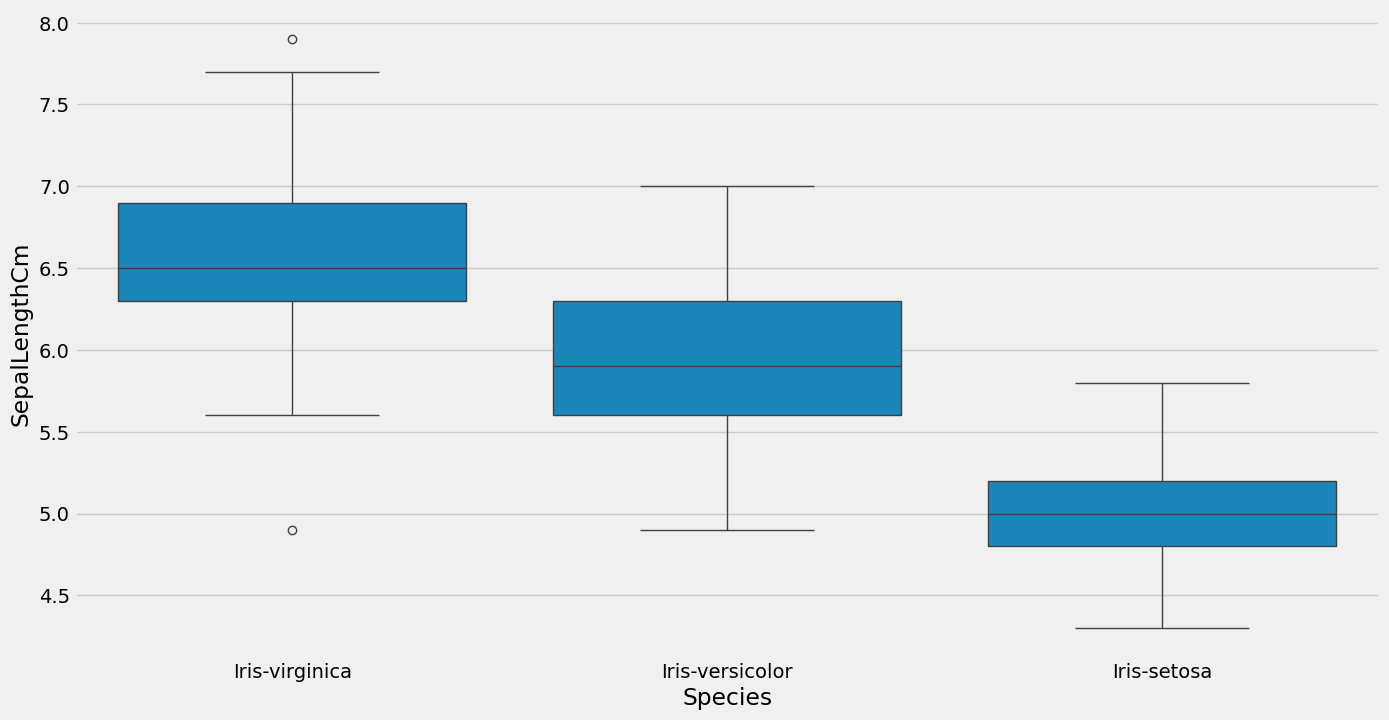

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

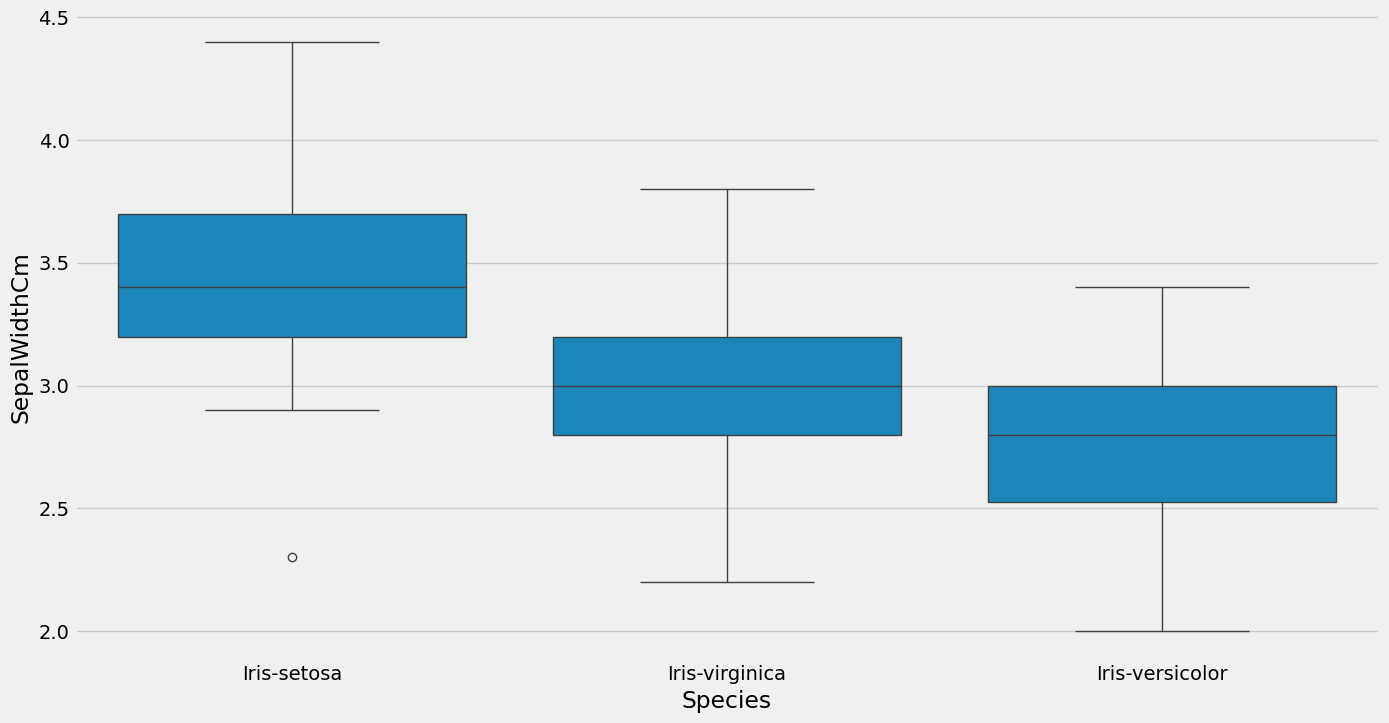

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False))

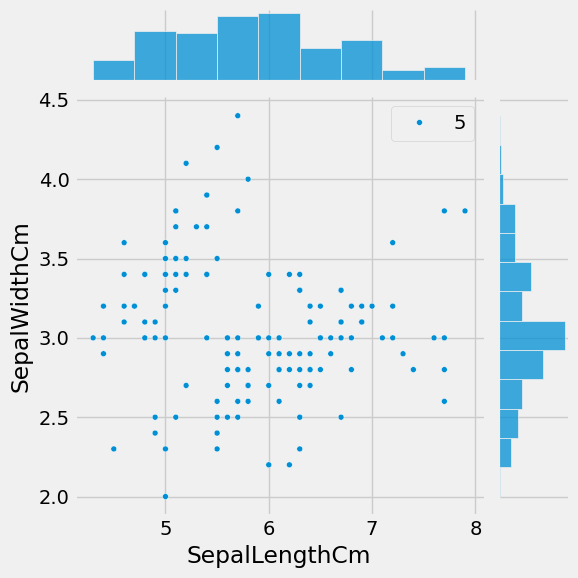

In [10]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

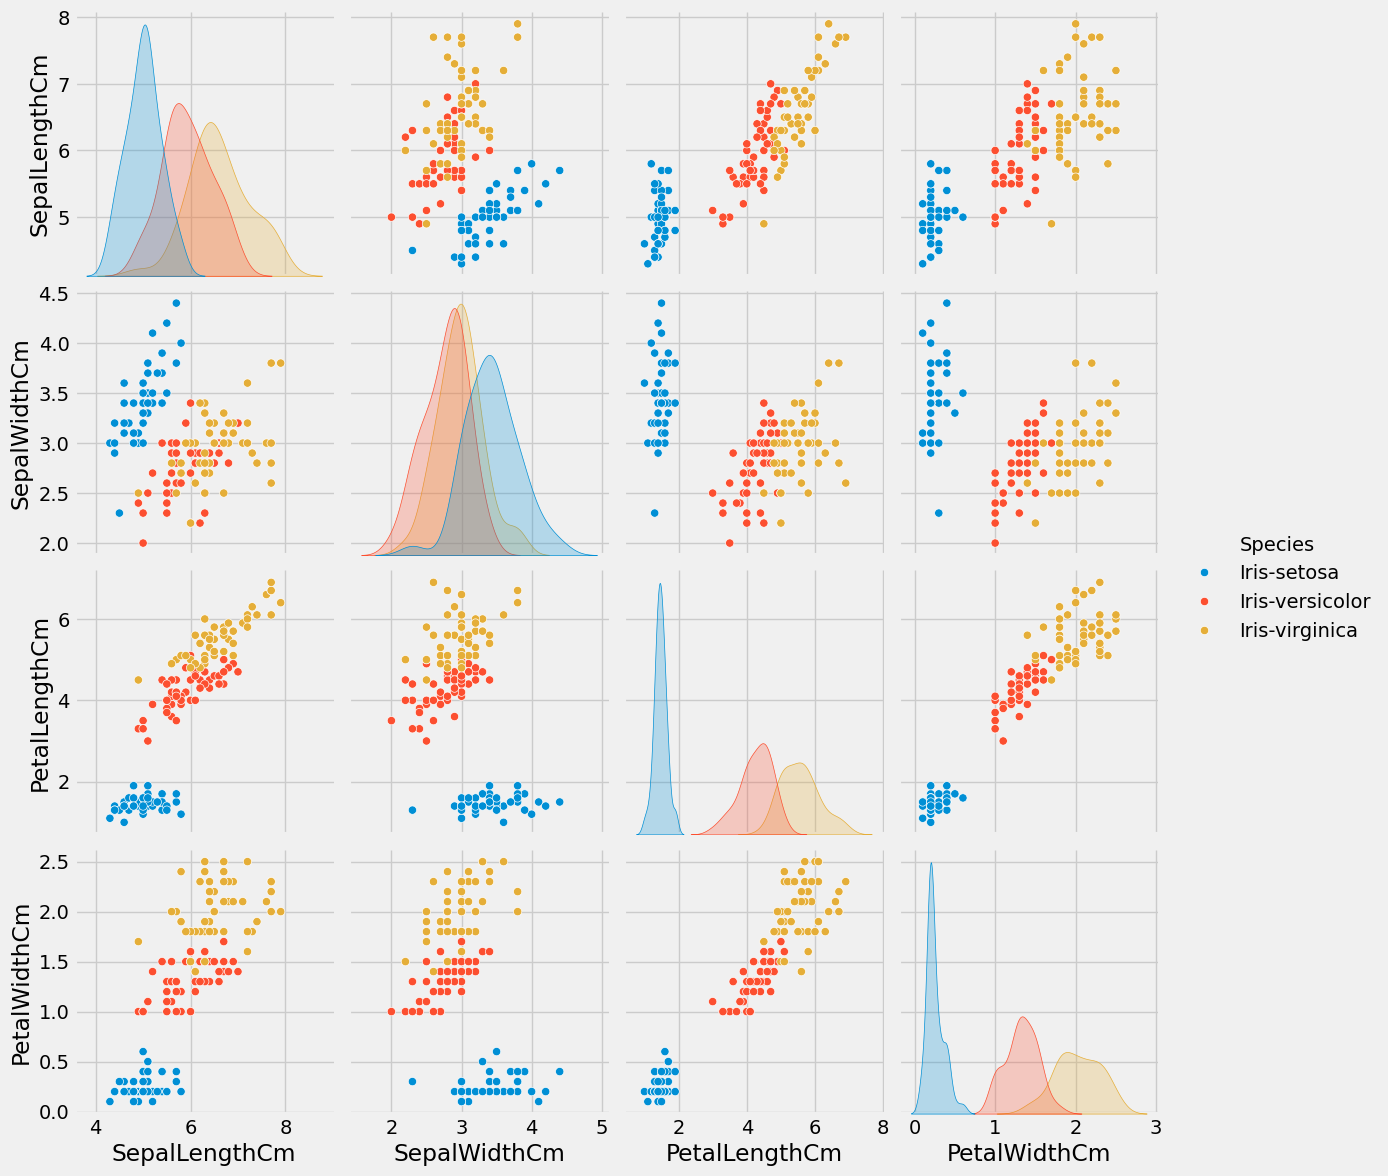

In [11]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

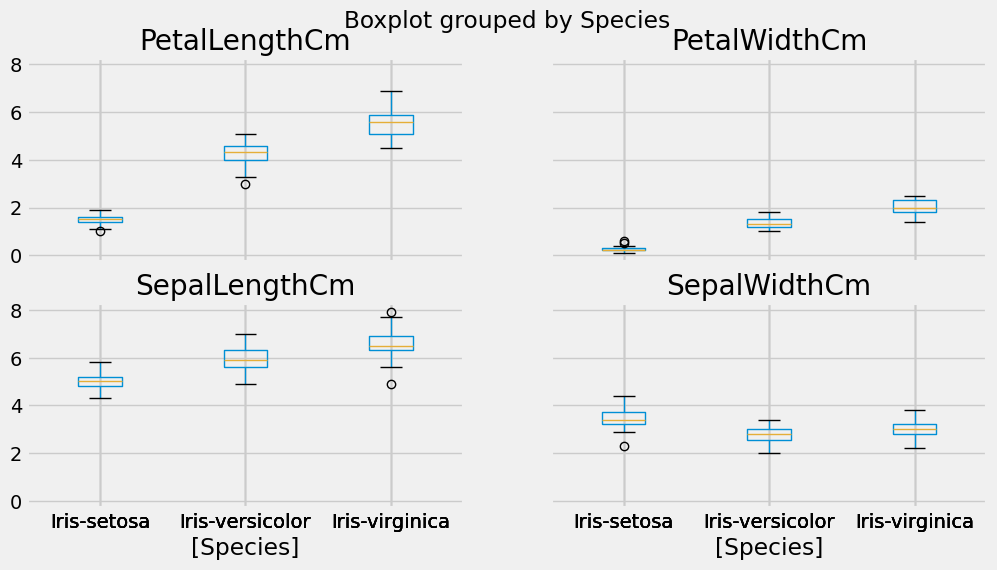

In [12]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

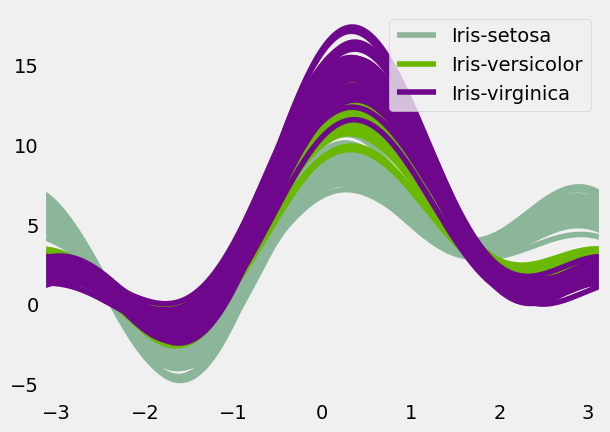

In [13]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

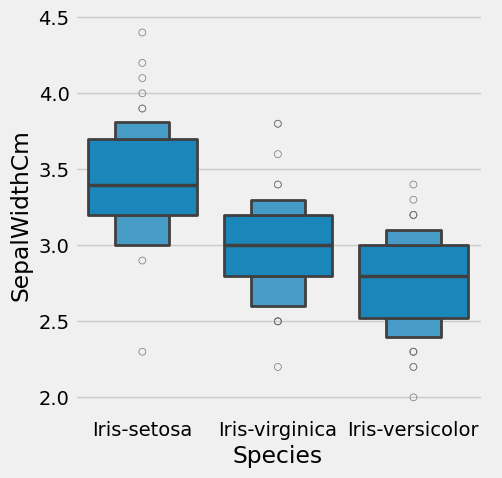

In [14]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

In [15]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [17]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3456 - loss: 1.5469 - val_accuracy: 0.3333 - val_loss: 1.4259
Epoch 2/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3341 - loss: 1.3715 - val_accuracy: 0.2889 - val_loss: 1.3122
Epoch 3/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3469 - loss: 1.2617 - val_accuracy: 0.3333 - val_loss: 1.2409
Epoch 4/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3313 - loss: 1.2210 - val_accuracy: 0.3333 - val_loss: 1.1780
Epoch 5/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3313 - loss: 1.1603 - val_accuracy: 0.3333 - val_loss: 1.1183
Epoch 6/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3375 - loss: 1.0906 - val_accuracy: 0.3333 - val_loss: 1.0651
Epoch 7/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3323 - loss: 1.0435 - val_accuracy: 0.3778 - val_loss: 1.0203
Epoch 8/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4868 - loss: 1.0056 - val_accuracy: 0.7333 - val_loss: 0.9830
Epoch 9

In [ ]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9199 - loss: 0.4197 


[0.4256431460380554, 0.9111111164093018]

In [ ]:
pred = model.predict(X_test[:10])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.0077119  0.32084897 0.6714391 ]
 [0.00657523 0.3218023  0.6716225 ]
 [0.09443309 0.52724814 0.3783187 ]
 [0.05588146 0.4974869  0.44663164]
 [0.8821293  0.10091007 0.01696067]
 [0.05417493 0.5230876  0.42273745]
 [0.00673523 0.27205655 0.7212082 ]
 [0.00755557 0.28693268 0.70551175]
 [0.8857498  0.09841971 0.01583042]
 [0.01726969 0.38351008 0.5992203 ]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
history.history['accuracy']

[0.343137264251709,
 0.343137264251709,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.529411792755127,
 0.8235294222831726,
 0.8725489974021912,
 0.9117646813392639,
 0.9019607901573181,
 0.6666666865348816,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6666666865348816,
 0.7647058963775635,
 0.970588207244873,
 0.9607843160629272,
 0.9607843160629272,
 0.9411764740943909,
 0.970588207244873,
 0.8529411554336548,
 0.7941176295280457,
 0.843137264251709,
 0.9509803652763367,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9215686321258545,
 0.843137264251709,
 0.813725471496582,
 0.8823529481887817,
 0.9607843160629272,
 0.970588207244873,
 0.9411764740943909,
 0.8627451062202454,
 0.9019607901573181,
 0.970588207244873,
 0.9803921580314636,
 0.9803921580314636,
 0.970588207244873,
 0.970588207244873]

In [ ]:
history.history['val_accuracy']

[0.3333333432674408,
 0.2888889014720917,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3777777850627899,
 0.7333333492279053,
 0.8444444537162781,
 0.8444444537162781,
 0.9111111164093018,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7333333492279053,
 0.9111111164093018,
 0.9777777791023254,
 0.9777777791023254,
 0.9333333373069763,
 0.9777777791023254,
 0.8666666746139526,
 0.7777777910232544,
 0.7777777910232544,
 0.8666666746139526,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.8222222328186035,
 0.7777777910232544,
 0.7777777910232544,
 0.9111111164093018,
 0.9777777791023254,
 0.9111111164093018,
 0.8444444537162781,
 0.8222222328186035,
 0.9111111164093018,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018]

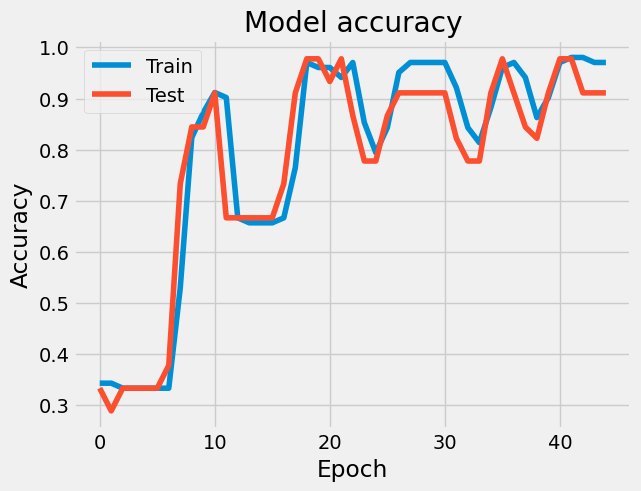

In [ ]:
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
